# get_dataset_names

In [1]:
from seaborn import get_dataset_names

get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

# load_dataset

In [4]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.sample(5)

URLError: <urlopen error [WinError 10054] 远程主机强迫关闭了一个现有的连接。>

# relplot

In [3]:
import matplotlib

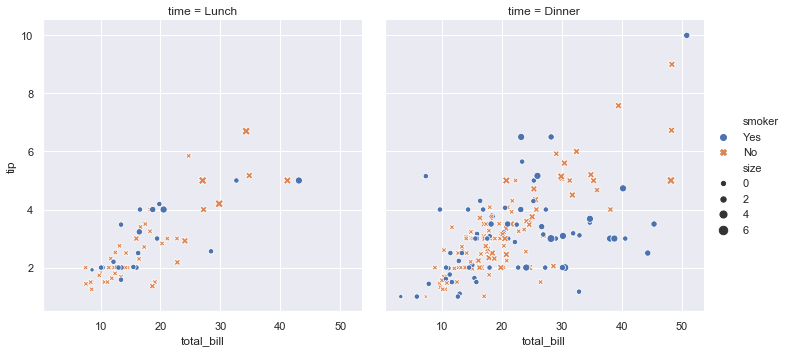

In [7]:
import seaborn as sns   ## 加载seaborn库
sns.set()      ## 应用默认的seaborn主题、缩放、调色板
tips = sns.load_dataset("tips")  ##载入需要的数据tips

%matplotlib inline  
##为了使图片在jupyter中显示
##绘制简单的分面散点图
fig = sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)
fig.savefig('分面散点图.png', dpi=400)
## dpi：每英寸点数 dots per inch

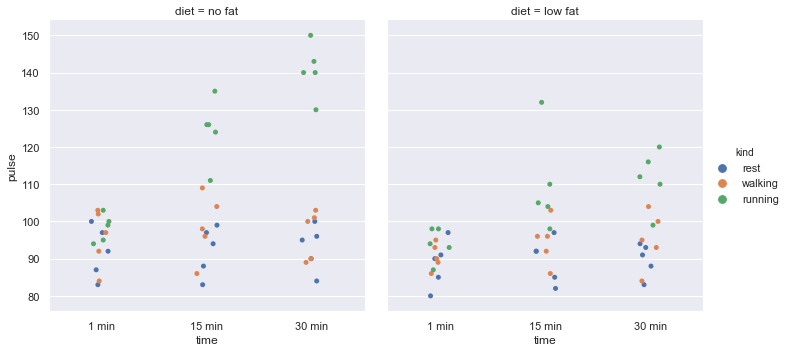

In [8]:
ex = sns.load_dataset("exercise")
ex.head()

fig = sns.catplot(x="time", y="pulse", hue="kind",
                  col="diet", data=ex)
fig.savefig('默认strip散点图.png', dpi=400)

# catplot

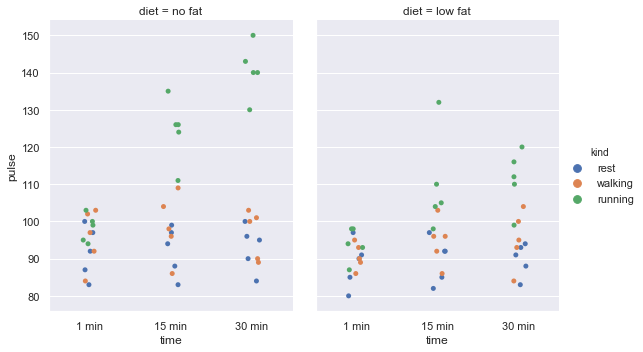

In [9]:
## 若参数aspect=0.8（改变的是坐标轴的横纵轴比）：
fig = sns.catplot(x="time", y="pulse", hue="kind",
           col="diet", data=ex, aspect=0.8)
fig.savefig('修改坐标轴横纵比-默认strip散点图.png', dpi=400)

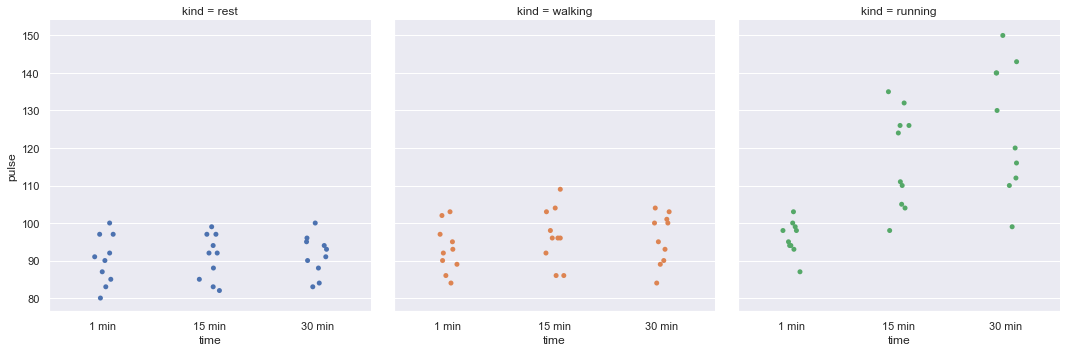

In [10]:
ex = sns.load_dataset("exercise")
fig = sns.catplot(x="time", y="pulse", hue="kind",
           col="kind", data=ex)
fig.savefig('散点图.png', dpi=400)

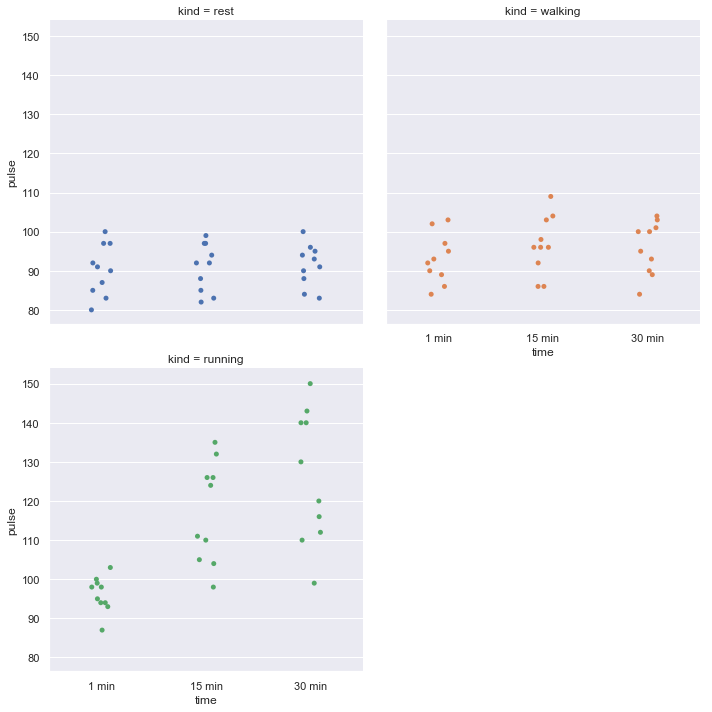

In [11]:
## 参数 col_wrap：表示输出的图形中每行panel的个数
ex = sns.load_dataset("exercise")
fig = sns.catplot(x="time", y="pulse", hue="kind",
           col="kind", data=ex, col_wrap=2)
fig.savefig('限制每行panel的个数-散点图.png', dpi=400)

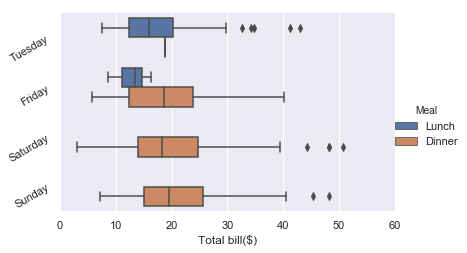

In [13]:
## 自定义图形的属性：
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

tips = sns.load_dataset("tips")    ## 导入数据
g = sns.catplot(x="total_bill", y="day", hue="time", 
               height=4, aspect=1.5, kind="box",
               legend=False, data=tips)
##加上图例，并修改图例的标题
g.add_legend(title="Meal")
##设置横轴和纵轴的标签
g.set_axis_labels("Total bill($)", "")
##设置x轴的取值范围、y轴的刻度标签
g.set(xlim=(0, 60), 
      yticklabels=["Tuesday", "Friday", "Saturday", "Sunday"])
##设置图片尺寸（单位：英寸）
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5 ,15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30)

g.savefig('自定义图形属性.png', dpi=500)

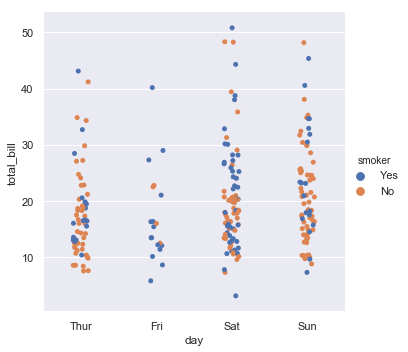

In [14]:
## catplot绘制默认strip：
import seaborn as sns

tips = sns.load_dataset("tips")   ## 加载数据
%matplotlib inline
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
           data=tips)
fig.savefig('散点图strip.png', dpi=500)

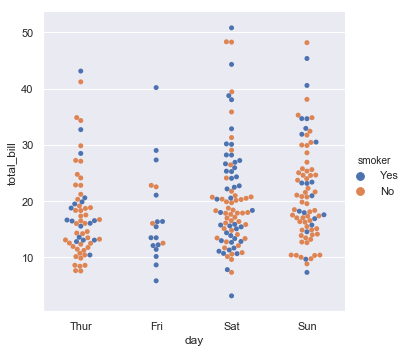

In [15]:
## catplot绘制swarm：
import seaborn as sns

tips = sns.load_dataset("tips")
%matplotlib inline
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
           kind="swarm", data=tips)

fig.savefig('散点图swarm.png', dpi=500)

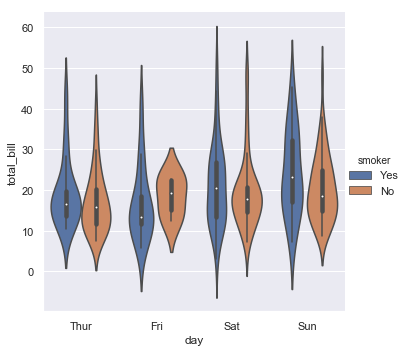

In [16]:
import seaborn as sns

tips = sns.load_dataset("tips")
%matplotlib inline
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
           data=tips, kind="violin")
fig.savefig('小提琴图.png', dpi=500)

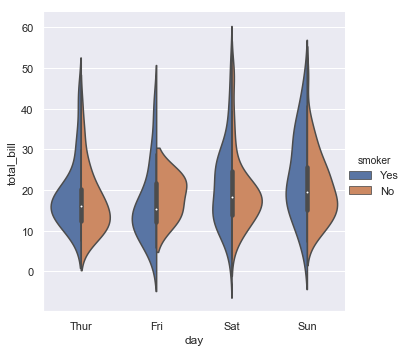

In [17]:
import seaborn as sns

tips = sns.load_dataset("tips")
%matplotlib inline
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
           data=tips, kind="violin", split=True)
fig.savefig('小提琴图split.png', dpi=500)

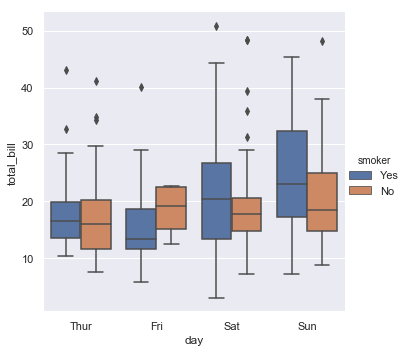

In [18]:
import seaborn as sns

tips = sns.load_dataset("tips")
%matplotlib inline
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
           data=tips, kind="box")
fig.savefig('箱线图.png', dpi=500)

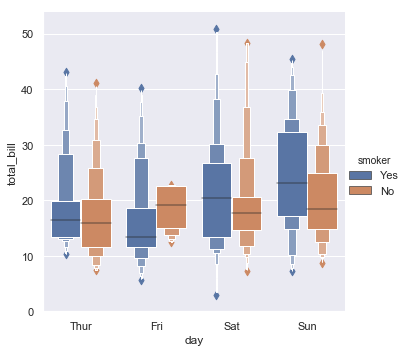

In [19]:
import seaborn as sns

tips = sns.load_dataset("tips")
%matplotlib inline
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
           data=tips, kind="boxen")
fig.savefig('i.png', dpi=500)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

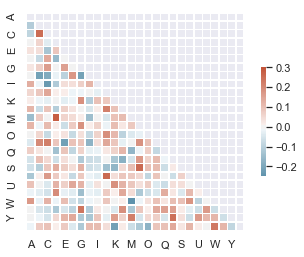

In [25]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 生成数据
rs = np.random.RandomState(33)
dat = pd.DataFrame(data=rs.normal(size=(100, 26)),
                  columns=list(ascii_letters[26:]))

## 计算相关系数矩阵
corr = dat.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

#f, ax = plt.subplots(figsize=(11, 9))
## 设置颜色
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, 
                 linewidths=.5, cbar_kws={'shrink': .5})
fig.savefig('相关系数矩阵图.png', dpi=500)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

## 使用随机游走（random walk）创建数据
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)  ## 生成-1到2之间的维度为20*5的数据
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)    ## 在列方向上重复[0, 1, 2, 3, 4]20次，行方向默认1次
walk = np.repeat(range(20), 5)  ## 将[0, 1, ..., 19]重复5次
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
df.head()
#  position step walk
# 0 0   0  0
# 1 1   1  0
# 2 1   2  0
# 3 1   3  0
# 4 0   4  0

grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)  ## col_wrap列维度限制
grid.map(plt.axhline, y=0, ls=":", c=".5")
## plt.axhline：绘制平行于x轴的水平参考线
## ls参数：linestyle

## 绘制折线图，展示随机游走的路径
grid.map(plt.plot, "step", "position", marker="o")

## 调整x轴刻度、y轴刻度，x轴、y轴坐标轴取值范围
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

grid.fig.tight_layout(w_pad=1)
grid.savefig('分面折线图.png', dpi=400)

In [2]:
pip install seaborn==0.11.1

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Note: you may need to restart the kernel to use updated packages.


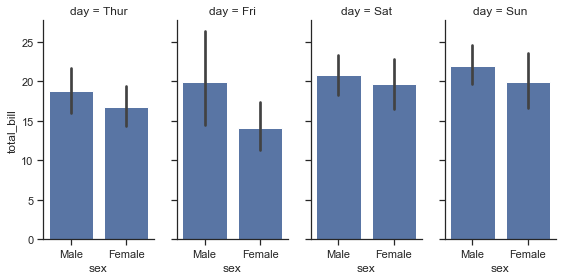

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips")  ## 载入数据
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)   ## 以day为分面的列
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])  ## 绘制直方图
g.savefig('分面直方图.png', dpi=400)

C:\Users\stwan\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


TypeError: 'NoneType' object is not subscriptable

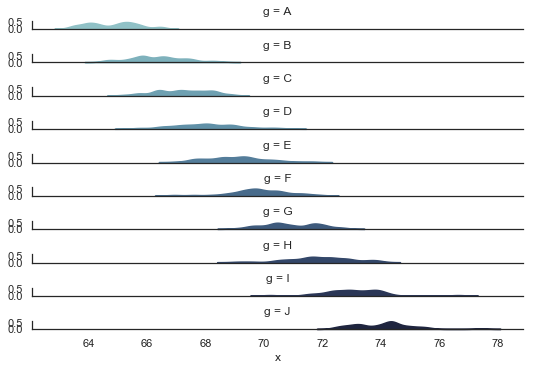

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# 构造数据
rs = np.random.RandomState(2021)
x = rs.randn(500)  ## 随机生成500个数据
g = np.tile(list("ABCDEFGHIJ"), 50)  ## 按列重复[A,B,...,I,J]50次
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m
df.head()
#  x   g
# 0 66.488609 A
# 1 66.676011 B
# 2 66.581549 C
# 3 67.193479 D
# 4 69.555876 E

pal = sns.cubehelix_palette(n_colors=10, rot=-.25, light=.7)  ## 生成序列调色盘；light：最浅颜色的强度
pp = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
pp.map(sns.kdeplot, "x",
       bw_adjust=.5, clip_on=False,
       fill=True, alpha=1, linewidth=1.5)
pp.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
pp.map(plt.axhline, y=0, lw=2, clip_on=False)  ## plt.axhline：绘制平行于x轴的水平参考线

def label(x, color, label):  ## 用于添加x轴刻度文本
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

pp.map(label, "x")

pp.fig.subplots_adjust(hspace=-.25)  ## 调整子图以重叠
pp.set_titles("")  ## 去除轴标题
pp.set(yticks=[])  ## 去除y轴刻度线
pp.despine(bottom=True, left=True)  ## 去除底部、左边的坐标脊
pp.savefig('重叠分面密度曲线图.png', dpi=400)

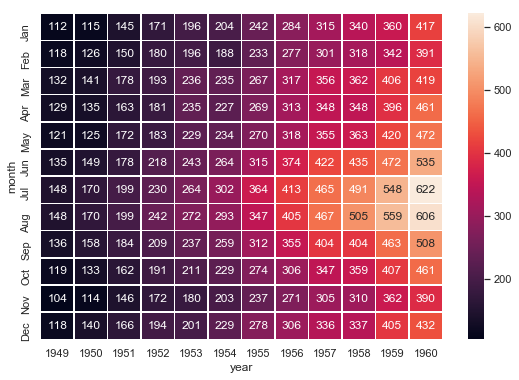

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

flights_long = sns.load_dataset("flights")  ## 载入数据
flights_long.head()
#  year month passengers
# 0 1949 Jan  112
# 1 1949 Feb  118
# 2 1949 Mar  132
# 3 1949 Apr  129
# 4 1949 May  121

## 变换数据形式
flights = flights_long.pivot("month", "year", "passengers")
flights.head()
# year 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
# month            
# Jan 112 115 145 171 196 204 242 284 315 340 360 417
# Feb 118 126 150 180 196 188 233 277 301 318 342 391
# Mar 132 141 178 193 236 235 267 317 356 362 406 419
# Apr 129 135 163 181 235 227 269 313 348 348 396 461
# May 121 125 172 183 229 234 270 318 355 363 420 472
f, ax = plt.subplots(figsize=(9, 6))
g = sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)
fig = g.get_figure()
fig.savefig('热力图.png', dpi=400)

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")  ## 载入数据
diamonds.head()
#  carat cut color clarity depth table price x y z
# 0 0.23 Ideal E SI2 61.5 55.0 326 3.95 3.98 2.43
# 1 0.21 Premium E SI1 59.8 61.0 326 3.89 3.84 2.31
# 2 0.23 Good E VS1 56.9 65.0 327 4.05 4.07 2.31
# 3 0.29 Premium I VS2 62.4 58.0 334 4.20 4.23 2.63
# 4 0.31 Good J SI2 63.3 58.0 335 4.34 4.35 2.75

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)  ## 移除上部、右边的坐标脊

g = sns.histplot(
    diamonds,
    x="price", hue="cut",  ## 根据cut区分颜色
    multiple="stack",
    palette="light:m_r",   ## 调色盘
    edgecolor=".3",        ## 柱状边的颜色
    linewidth=.5,          ## 线条宽度
    log_scale=True,        ## Set a log scale on the data axis
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())  ## 设置x轴主刻度格式
ax.set_xticks([500, 1000, 2000, 5000, 10000])  ## 设置x轴刻度文本

fig = g.get_figure()
fig.savefig('柱状图.png', dpi=400)

In [ ]:
import seaborn as sns
sns.set_theme(style="white", color_codes=True)  ## 设置主题
mpg = sns.load_dataset("mpg")  ## 载入数据mpg
mpg.head()
#  mpg cylinders displacement horsepower weight acceleration model_year origin name
# 0 18.0 8 307.0 130.0 3504 12.0 70 usa chevrolet chevelle malibu
# 1 15.0 8 350.0 165.0 3693 11.5 70 usa buick skylark 320
# 2 18.0 8 318.0 150.0 3436 11.0 70 usa plymouth satellite
# 3 16.0 8 304.0 150.0 3433 12.0 70 usa amc rebel sst
# 4 17.0 8 302.0 140.0 3449 10.5 70 usa ford torino

g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=mpg["horsepower"], sizes=(30, 120),  ## 根据horsepower调整散点的大小
             color="g", alpha=.6, legend=False)
g.savefig('0104散点图.png', dpi=400)

In [ ]:
g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=mpg["horsepower"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)
g.savefig('散点图+刻度线.png', dpi=400)

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")  ## 设置主题

tips = sns.load_dataset("tips")  ## 载入数据 tips
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,  ## 画回归线
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)
g.savefig('jointplot边际直方分布图.png', dpi=400)

In [1]:
import numpy as np
import seaborn as sns 

x=np.random.randn(100)  #随机生成100个符合正态分布的数
g = sns.kdeplot(x)  ## 简单的一维核密度估计图
fig = g.get_figure()
fig.savefig('简单的一维核密度估计图.png', dpi=400)

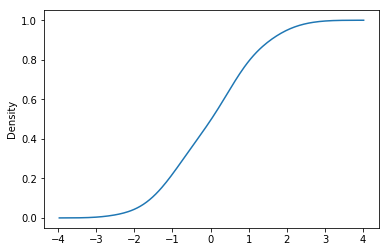

In [2]:
g = sns.kdeplot(x, cumulative=True)
fig = g.get_figure()
fig.savefig('一维核密度估计累积图.png', dpi=400)

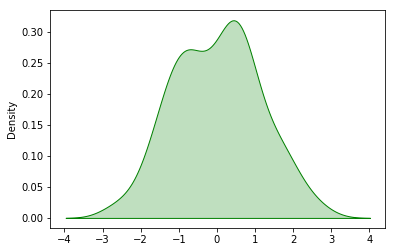

In [3]:
g = sns.kdeplot(x, shade=True, color='g')  ## 颜色为绿色 green
fig = g.get_figure()
fig.savefig('一维核密度估计图-绘制阴影.png', dpi=400)

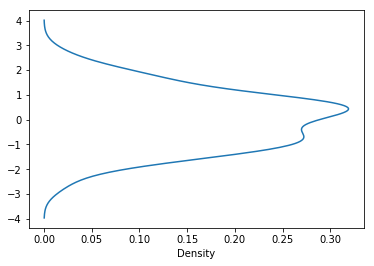

In [4]:
g = sns.kdeplot(y=x)  ## 以y轴进行绘制
fig = g.get_figure()
fig.savefig('一维核密度估计图-以y轴进行绘制.png', dpi=400)

C:\Users\stwan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


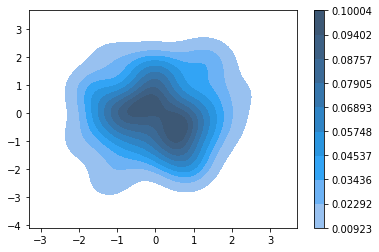

In [5]:
x = np.random.randn(100)
y = np.random.randn(100)
g = sns.kdeplot(x, y, shade=True, cbar=True)
fig = g.get_figure()
fig.savefig('二维核密度估计图.png', dpi=400)

C:\Users\stwan\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


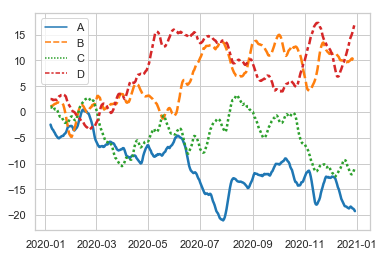

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)  ## 随机生成365*4的数据
dates = pd.date_range("1 1 2020", periods=365, freq="D")  ## 从2020.01.01开始、按天分配日期
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data.head()
#     A   B   C   D
# 2020-01-01 0.167921 0.523505 0.817376 1.703846
# 2020-01-02 -1.979026 1.237704 0.057230 2.743267
# 2020-01-03 -2.945478 1.094025 1.628355 2.359988
# 2020-01-04 -2.307479 0.749367 1.624072 2.518347
# 2020-01-05 -3.270573 0.333310 1.867085 2.866550
data = data.rolling(7).mean()
g = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
fig = g.get_figure()
fig.savefig('线形图.png', dpi=400)

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'

df = pd.read_csv(url, error_bad_lines=False)  ## 加载penguins数据
df.head()
#  species island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g sex
# 0 Adelie Torgersen 39.1 18.7 181.0 3750.0 MALE
# 1 Adelie Torgersen 39.5 17.4 186.0 3800.0 FEMALE
# 2 Adelie Torgersen 40.3 18.0 195.0 3250.0 FEMALE
# 3 Adelie Torgersen NaN NaN NaN NaN NaN
# 4 Adelie Torgersen 36.7 19.3 193.0 3450.0 FEMALE

import seaborn as sns

sns.set_style('ticks')  ## 设置主题；set_theme()函数已弃用
fig = sns.pairplot(df, hue="species")  ## species决定色彩
fig.savefig('两两配对散点图.png', dpi=400)

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

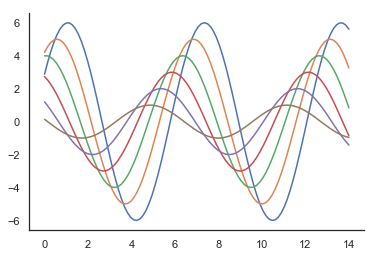

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

f = plt.figure(figsize=(6, 4))

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sinplot()
sns.despine()
f.savefig('去除坐标脊.png', dpi=400)

# lmplot

<Figure size 432x288 with 0 Axes>

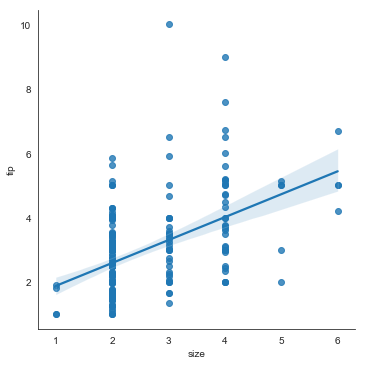

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")  ##载入需要的数据tips

sns.set_style('white')
f = plt.figure(figsize=(6, 4))
g = sns.lmplot(x = 'size', y = 'tip', data = tips)
g

<Figure size 432x288 with 0 Axes>

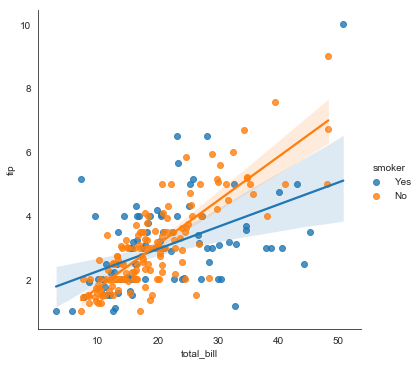

In [8]:
import seaborn as sns

tips = sns.load_dataset("tips")  ##载入需要的数据tips
sns.set_style('white')
f = plt.figure(figsize=(6, 4))
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)
g.savefig('线性回归1.png')

<Figure size 432x288 with 0 Axes>

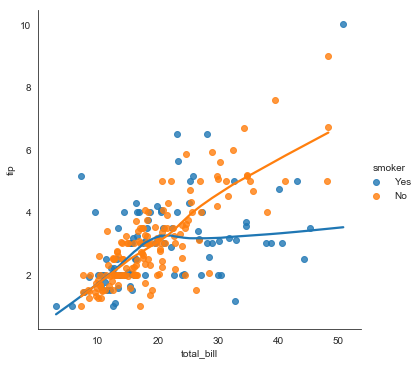

In [9]:
import seaborn as sns

tips = sns.load_dataset("tips")  ##载入需要的数据tips
sns.set_style('white')
f = plt.figure(figsize=(6, 4))
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", lowess = True, data=tips)
g.savefig('局部加权线性回归.png')

## 对数线性回归

<Figure size 432x288 with 0 Axes>

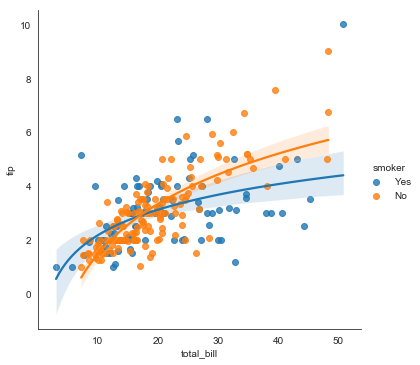

In [10]:
import seaborn as sns

tips = sns.load_dataset("tips")  ##载入需要的数据tips
sns.set_style('white')
f = plt.figure(figsize=(6, 4))
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", logx = True, data=tips)
g.savefig('对数线性回归.png')

## 稳健线性回归

<Figure size 432x288 with 0 Axes>

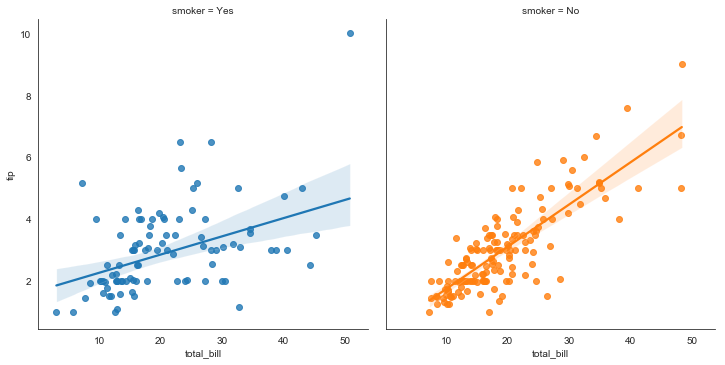

In [11]:
import seaborn as sns

tips = sns.load_dataset("tips")  ##载入需要的数据tips
sns.set_style('white')
f = plt.figure(figsize=(6, 4))
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", col="smoker", 
               robust = True, data=tips)
g.savefig('稳健线性回归.png')

## 多项式回归